In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('religion-survey-results.csv')

df
# df.columns
# df.describe()


,"What is your present religion, if any?",Unnamed: 1,Do you consider yourself to be an evangelical?,Do you attend religious services,"How often do you: Pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc)","How often do you: Pray in public using some kind of physical object (rosary, tefillin, etc)",How often do you: Pray aloud before meals in the presence of people who don't belong to your religion,How often do you: Tell someone you'll pray for him or her,How often do you: Ask or offer to pray with someone,"How often do you: Bring up your religion, unprompted, in conversation",...,How comfortable would you be seeing someone who practices a different religion from you: Ask or offer to pray with you,"How comfortable would you be seeing someone who practices a different religion from you: Bring up his or her own religion, unprompted, in conversation","How comfortable would you be seeing someone who practices a different religion from you: Ask you about your religion, unprompted, in conversation","How comfortable would you be seeing someone who practices a different religion from you: Decline some kind of food or beverage for religious reasons (kosher, halal, fasting rules, etc)","How comfortable would you be seeing someone who practices a different religion from you: Wear religious clothing/jewelry (hijab, kippah, wig, kara, turban, cross, etc)","How comfortable would you be seeing someone who practices a different religion from you: Participate in a public religious event on the streets (Corpus Christi procession, inauguration of Torah scrolls, etc)",What is your age?,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,Response,None of these,Response,Response,Response,Response,Response,Response,Response,Response,...,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,None of these,Wesleyan Christian,No,Weekly or more,A few times per week,Not applicable to my religious beliefs,A few times per month,A few times per week,Never,A few times per month,...,Extremely comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,18 - 29,Male,"$0 to $9,999",East North Central
2,Atheist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Very comfortable,Somewhat comfortably,Very comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,18 - 29,Male,"$10,000 to $24,999",Middle Atlantic
3,Protestant,NaN,No,Weekly or more,A few times per month,Never,Once a year or less,A few times per month,A few times per month,A few times per month,...,Extremely comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,18 - 29,Male,"$25,000 to $49,999",East North Central
4,Muslim,NaN,No,Weekly or more,Every day,A few times per month,Never,Once a month or less,Once a month or less,Never,...,Very comfortable,Very comfortable,Very comfortable,Very comfortable,Very comfortable,Very comfortable,18 - 29,Male,"$0 to $9,999",South Atlantic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,Roman Catholic,NaN,No,Never,Never,Never,Never,Never,Never,Never,...,Not at all comfortable,Not at all comfortable,Not at all comfortable,Not at all comfortable,Not at all comfortable,Not at all comfortable,18 - 29,Male,"$10,000 to $24,999",Mountain
1036,None of these,Secular Humanist,No,Never,Never,Never,Never,Never,Never,Never,...,Not at all comfortable,Somewhat comfortably,Extremely comfortable,Very comfortable,Very comfortable,Very comfortable,45 - 59,Female,Prefer not to answer,East South Central
1037,Buddhist,NaN,No,Weekly or more,Never,Never,Never,A few times per week,Never,Never,...,Very comfortable,Extremely comfortable,Not at all comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,45 - 59,Female,"$200,000 and up",East South Central
103

In [2]:
df.iloc[0].nunique()

2

In [3]:
# Check for missing values
print(df.isnull().sum())
df = df.fillna("No Answer")
df = df.iloc[1:]


# Handle missing values
# For example, drop columns with high missing values
# df = df.dropna(thresh=len(df) * 0.8, axis=1)

# Rename columns
new_columns = {
    'What is your present religion, if any?': 'Religion',
    'Unnamed: 1': 'UnlistedReligion',
    'Do you consider yourself to be an evangelical?': 'Evangelical',
    'Do you attend religious services': 'AttendReligiousServices',
    'How often do you: Pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc)': 'PrayPublicVisibleMotions',
    'How often do you: Pray in public using some kind of physical object (rosary, tefillin, etc)': 'PrayPublicPhysicalObject',
    'How often do you: Pray aloud before meals in the presence of people who don\'t belong to your religion': 'PrayAloudBeforeMeals',
    'How often do you: Tell someone you\'ll pray for him or her': 'TellSomeonePrayFor',
    'How often do you: Ask or offer to pray with someone': 'AskOfferPrayWith',
    'How often do you: Bring up your religion, unprompted, in conversation': 'BringUpReligionUnprompted',
    'How often do you: Ask others about their religion, unprompted, in conversation': 'AskOthersReligionUnprompted',
    'How often do you: Decline some kind of food or beverage for religious reasons (kosher, halal, fasting rules, etc)': 'DeclineFoodReligiousReasons',
    'How often do you: Wear religious clothing/jewelry (hijab, kippah, wig, kara, turban, cross, etc)': 'WearReligiousClothingJewelry',
    'How often do you: Participate in a public religious event on the streets (Corpus Christi procession, inauguration of Torah scrolls, etc)': 'ParticipatePublicReligiousEvent',
    'How comfortable do you feel when you: Pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc)': 'ComfortablePrayPublicVisibleMotions',
    'How comfortable do you feel when you: Pray in public using some kind of physical object (rosary, tefillin, etc)': 'ComfortablePrayPublicPhysicalObject',
    'How comfortable do you feel when you: Pray aloud before meals in the presence of people who don\'t belong to your religion': 'ComfortablePrayAloudBeforeMeals',
    'How comfortable do you feel when you: Tell someone you\'ll pray for him or her': 'ComfortableTellSomeonePrayFor',
    'How comfortable do you feel when you: Ask or offer to pray with someone': 'ComfortableAskOfferPrayWith',
    'How comfortable do you feel when you: Bring up your religion, unprompted, in conversation': 'ComfortableBringUpReligionUnprompted',
    'How comfortable do you feel when you: Ask others about their religion, unprompted, in conversation': 'ComfortableAskOthersReligionUnprompted',
    'How comfortable do you feel when you: Decline some kind of food or beverage for religious reasons (kosher, halal, fasting rules, etc)': 'ComfortableDeclineFoodReligiousReasons',
    'How comfortable do you feel when you: Wear religious clothing/jewelry (hijab, kippah, wig, kara, turban, cross, etc)': 'ComfortableWearReligiousClothingJewelry',
    'How comfortable do you feel when you: Participate in a public religious event on the streets (Corpus Christi procession, inauguration of Torah scrolls, etc)': 'ComfortableParticipatePublicReligiousEvent',
    'How comfortable do you think someone outside your religion would be if they saw you: Pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc)': 'ComfortableThinkSomeoneSeePrayPublicVisibleMotions',
    'How comfortable do you think someone outside your religion would be if they saw you: Pray in public using some kind of physical object (rosary, tefillin, etc)': 'ComfortableThinkSomeoneSeePrayPublicPhysicalObject',
    'How comfortable do you think someone outside your religion would be if they saw you: Pray aloud before meals in the presence of people who don\'t belong to your religion': 'ComfortableThinkSomeoneSeePrayAloudBeforeMeals',
    'How comfortable do you think someone outside your religion would be if they saw you: Tell someone you\'ll pray for him or her': 'ComfortableThinkSomeoneSeeTellSomeonePrayFor',
    'How comfortable do you think someone outside your religion would be if they saw you: Ask or offer to pray with someone': 'ComfortableThinkSomeoneSeeAskOfferPrayWith',
    'How comfortable do you think someone outside your religion would be if they saw you: Bring up your religion, unprompted, in conversation': 'ComfortableThinkSomeoneSeeBringUpReligionUnprompted',
    'How comfortable do you think someone outside your religion would be if they saw you: Ask others about their religion, unprompted, in conversation': 'ComfortableThinkSomeoneSeeAskOthersReligionUnprompted',
    'How comfortable do you think someone outside your religion would be if they saw you: Decline some kind of food or beverage for religious reasons (kosher, halal, fasting rules, etc)': 'ComfortableThinkSomeoneSeeDeclineFoodReligiousReasons',
    'How comfortable do you think someone outside your religion would be if they saw you: Wear religious clothing/jewelry (hijab, kippah, wig, kara, turban, cross, etc)': 'ComfortableThinkSomeoneSeeWearReligiousClothingJewelry',
    'How comfortable do you think someone outside your religion would be if they saw you: Participate in a public religious event on the streets (Corpus Christi procession, inauguration of Torah scrolls, etc)': 'ComfortableThinkSomeoneSeeParticipatePublicReligiousEvent',
    'How comfortable would you be seeing someone who practices a different religion from you: Pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc)': 'ComfortableSeeingDifferentReligionPrayPublicVisibleMotions',
    'How comfortable would you be seeing someone who practices a different religion from you: Pray in public using some kind of physical object (rosary, tefillin, etc)': 'ComfortableSeeingDifferentReligionPrayPublicPhysicalObject',
    'How comfortable would you be seeing someone who practices a different religion from you: Pray aloud before meals in the presence of people who don\'t belong to that religion': 'ComfortableSeeingDifferentReligionPrayAloudBeforeMeals',
    'How comfortable would you be seeing someone who practices a different religion from you: Tell someone "I\'ll pray for you"': 'ComfortableSeeingDifferentReligionTellSomeonePrayFor',
    'How comfortable would you be seeing someone who practices a different religion from you: Ask or offer to pray with you': 'ComfortableSeeingDifferentReligionAskOfferPrayWith',
    'How comfortable would you be seeing someone who practices a different religion from you: Bring up his or her own religion, unprompted, in conversation': 'ComfortableSeeingDifferentReligionBringUpReligionUnprompted',
    'How comfortable would you be seeing someone who practices a different religion from you: Ask you about your religion, unprompted, in conversation': 'ComfortableSeeingDifferentReligionAskYouReligionUnprompted',
    'How comfortable would you be seeing someone who practices a different religion from you: Decline some kind of food or beverage for religious reasons (kosher, halal, fasting rules, etc)': 'ComfortableSeeingDifferentReligionDeclineFoodReligiousReasons',
    'How comfortable would you be seeing someone who practices a different religion from you: Wear religious clothing/jewelry (hijab, kippah, wig, kara, turban, cross, etc)': 'ComfortableSeeingDifferentReligionWearReligiousClothingJewelry',
    'How comfortable would you be seeing someone who practices a different religion from you: Participate in a public religious event on the streets (Corpus Christi procession, inauguration of Torah scrolls, etc)': 'ComfortableSeeingDifferentReligionParticipatePublicReligiousEvent',
    'What is your age?': 'Age',
    'What is your gender?': 'Gender',
    'How much total combined money did all members of your HOUSEHOLD earn last year?': 'HouseholdIncome',
    'US Region': 'Region'
}

df = df.rename(columns=new_columns)

# Verify column names after renaming
df

What is your present religion, if any?                                                                                                                                                                               0
Unnamed: 1                                                                                                                                                                                                         797
Do you consider yourself to be an evangelical?                                                                                                                                                                     119
Do you attend religious services                                                                                                                                                                                   113
How often do you: Pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc)                              

,Religion,UnlistedReligion,Evangelical,AttendReligiousServices,PrayPublicVisibleMotions,PrayPublicPhysicalObject,PrayAloudBeforeMeals,TellSomeonePrayFor,AskOfferPrayWith,BringUpReligionUnprompted,...,ComfortableSeeingDifferentReligionAskOfferPrayWith,ComfortableSeeingDifferentReligionBringUpReligionUnprompted,ComfortableSeeingDifferentReligionAskYouReligionUnprompted,ComfortableSeeingDifferentReligionDeclineFoodReligiousReasons,ComfortableSeeingDifferentReligionWearReligiousClothingJewelry,ComfortableSeeingDifferentReligionParticipatePublicReligiousEvent,Age,Gender,HouseholdIncome,Region
1,None of these,Wesleyan Christian,No,Weekly or more,A few times per week,Not applicable to my religious beliefs,A few times per month,A few times per week,Never,A few times per month,...,Extremely comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,18 - 29,Male,"$0 to $9,999",East North Central
2,Atheist,No Answer,No Answer,No Answer,No Answer,No Answer,No Answer,No Answer,No Answer,No Answer,...,Very comfortable,Somewhat comfortably,Very comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,18 - 29,Male,"$10,000 to $24,999",Middle Atlantic
3,Protestant,No Answer,No,Weekly or more,A few times per month,Never,Once a year or less,A few times per month,A few times per month,A few times per month,...,Extremely comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,18 - 29,Male,"$25,000 to $49,999",East North Central
4,Muslim,No Answer,No,Weekly or more,Every day,A few times per month,Never,Once a month or less,Once a month or less,Never,...,Very comfortable,Very comfortable,Very comfortable,Very comfortable,Very comfortable,Very comfortable,18 - 29,Male,"$0 to $9,999",South Atlantic
5,None of these,Working on Christianity. Orthodox seemed too c...,No,Weekly or more,Never,Never,Never,Once a month or less,A few times per month,Once a month or less,...,Not so comfortable,Not so comfortable,Not so comfortable,Not so comfortable,Very comfortable,Somewhat comfortably,18 - 29,Male,"$75,000 to $99,999",Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,Roman Catholic,No Answer,No,Never,Never,Never,Never,Never,Never,Never,...,Not at all comfortable,Not at all comfortable,Not at all comfortable,Not at all comfortable,Not at all comfortable,Not at all comfortable,18 - 29,Male,"$10,000 to $24,999",Mountain
1036,None of these,Secular Humanist,No,Never,Never,Never,Never,Never,Never,Never,...,Not at all comfortable,Somewhat comfortably,Extremely comfortable,Very comfortable,Very comfortable,Very comfortable,45 - 59,Female,Prefer not to answer,East South Central
1037,Buddhist,No Answer,No,Weekly or more,Never,Never,Never,A few times per week,Never,Never,...,Very comfortable,Extremely comfortable,Not at all comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,45 - 59,Female,"$200,000 and up",East South Central
1038,Roman Catholic,No Answer,No,Never,Once a year or less,Once a year or less,Never,Once a year or less,Never,Once a year or less,...,Somewhat comfortably,Somewhat comfortably,Very comfortable,Somewhat comfortably,Somewhat comfortably,Somewhat comfortably,18 - 29,Male,"$0 to $9,999",Pacific


In [4]:
# Define the mapping of age ranges to numeric values
# age_range_mapping = {"18 - 29":1, "30 - 44":2, "45 - 59":3, "60+":4}

# Create a new column 'AgeValue' by mapping the age ranges to their corresponding numeric values
# df['AgeValue'] = df['Age'].map(age_range_mapping)
df.reset_index(inplace=True)
df.rename(columns={'index': 'RespondentID'}, inplace=True)
df = df.replace(r'Somewhat comfortably', 'Somewhat Comfortable', regex=True)
df = df.replace(r'Extremely comfortable', 'Extremely Comfortable', regex=True)
df = df.replace(r'Very comfortable', 'Very Comfortable', regex=True)
df = df.replace(r'Not so comfortable', 'Not So Comfortable', regex=True)
df = df.replace(r'Not at all comfortable', 'Not At All Comfortable', regex=True)
df


,RespondentID,Religion,UnlistedReligion,Evangelical,AttendReligiousServices,PrayPublicVisibleMotions,PrayPublicPhysicalObject,PrayAloudBeforeMeals,TellSomeonePrayFor,AskOfferPrayWith,...,ComfortableSeeingDifferentReligionAskOfferPrayWith,ComfortableSeeingDifferentReligionBringUpReligionUnprompted,ComfortableSeeingDifferentReligionAskYouReligionUnprompted,ComfortableSeeingDifferentReligionDeclineFoodReligiousReasons,ComfortableSeeingDifferentReligionWearReligiousClothingJewelry,ComfortableSeeingDifferentReligionParticipatePublicReligiousEvent,Age,Gender,HouseholdIncome,Region
0,1,None of these,Wesleyan Christian,No,Weekly or more,A few times per week,Not applicable to my religious beliefs,A few times per month,A few times per week,Never,...,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,18 - 29,Male,"$0 to $9,999",East North Central
1,2,Atheist,No Answer,No Answer,No Answer,No Answer,No Answer,No Answer,No Answer,No Answer,...,Very Comfortable,Somewhat Comfortable,Very Comfortable,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,18 - 29,Male,"$10,000 to $24,999",Middle Atlantic
2,3,Protestant,No Answer,No,Weekly or more,A few times per month,Never,Once a year or less,A few times per month,A few times per month,...,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,18 - 29,Male,"$25,000 to $49,999",East North Central
3,4,Muslim,No Answer,No,Weekly or more,Every day,A few times per month,Never,Once a month or less,Once a month or less,...,Very Comfortable,Very Comfortable,Very Comfortable,Very Comfortable,Very Comfortable,Very Comfortable,18 - 29,Male,"$0 to $9,999",South Atlantic
4,5,None of these,Working on Christianity. Orthodox seemed too c...,No,Weekly or more,Never,Never,Never,Once a month or less,A few times per month,...,Not So Comfortable,Not So Comfortable,Not So Comfortable,Not So Comfortable,Very Comfortable,Somewhat Comfortable,18 - 29,Male,"$75,000 to $99,999",Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,1035,Roman Catholic,No Answer,No,Never,Never,Never,Never,Never,Never,...,Not At All Comfortable,Not At All Comfortable,Not At All Comfortable,Not At All Comfortable,Not At All Comfortable,Not At All Comfortable,18 - 29,Male,"$10,000 to $24,999",Mountain
1035,1036,None of these,Secular Humanist,No,Never,Never,Never,Never,Never,Never,...,Not At All Comfortable,Somewhat Comfortable,Extremely Comfortable,Very Comfortable,Very Comfortable,Very Comfortable,45 - 59,Female,Prefer not to answer,East South Central
1036,1037,Buddhist,No Answer,No,Weekly or more,Never,Never,Never,A few times per week,Never,...,Very Comfortable,Extremely Comfortable,Not At All Comfortable,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,45 - 59,Female,"$200,000 and up",East South Central
1037,1038,Roman Catholic,No Answer,No,Never,Once a year or less,Once a year or less,Never,Once a year or less,Never,...,Somewhat Comfortable,Somewhat Comfortable,Very Comfortable,Somewhat Comfortable,Somewhat Comfortable,Somewhat Comfortable,18 - 29,Male,"$0 to $9,999",Pacific


In [5]:
df5 = df['ComfortableSeeingDifferentReligionAskYouReligionUnprompted'].drop_duplicates()
comf_rating = pd.DataFrame(df5)
comf_rating.reset_index(inplace=True)
comf_rating['index'] = [5, 4, 2, 3, 1, 0]
comf_rating.rename(columns={'index':'ComfortID'}, inplace=True)
comf_rating = comf_rating.sort_values('ComfortID', ascending=False)
comf_rating.set_index("ComfortID", inplace=True)
# comf_rating.to_dict()
# comf_rtg_dict = dict(zip(comf_rating['ComfortID'], df['ComfortableSeeingDifferentReligionAskYouReligionUnprompted']))
comf_rtg = comf_rating["ComfortableSeeingDifferentReligionAskYouReligionUnprompted"].to_dict()
# comf_rating
rev_comf = {value: key for key, value in comf_rtg.items()}
# rev_comf
comf_rating = comf_rating.rename(columns={'ComfortableSeeingDifferentReligionAskYouReligionUnprompted':'ComfortLevel'})
comf_rating

,ComfortLevel
ComfortID,
5,Extremely Comfortable
4,Very Comfortable
3,Somewhat Comfortable
2,Not So Comfortable
1,Not At All Comfortable
0,No Answer


In [6]:
cat_columns = ['Religion', 'Gender', 'Region']
for column in cat_columns:
    print(column, df[column].nunique())


Religion 11
Gender 2
Region 10


In [7]:
df_titles = pd.DataFrame({'Column Titles': df.columns[df.columns.isin(comfort_columns)]})
# df_titles = df['RespondentID']
df_titles.reset_index(inplace=True)
df_titles.rename(columns={'index': 'ComfTypeID'}, inplace=True)
df_titles.set_index('ComfTypeID', inplace=True)
# comfortid_dict = df_titles.set_index('ComfortID')['Column Titles'].to_dict()
# comfortid_dict
# dfgrp = df[['Religion'] + ['UnlistedReligion']].groupby('Religion')
# dfgrp

NameError: name 'comfort_columns' is not defined

In [ ]:
df_ageranges = pd.DataFrame({"Age": df["Age"]}).drop_duplicates()
df_ageranges = df_ageranges.reset_index(inplace=False)
# df_ageranges
df_ageranges['index'] = [0, 1, 2, 3]
# df_ageranges
df_ageranges.rename(columns={'index': 'AgeID'}, inplace=True)
pd.DataFrame(df_ageranges.set_index('AgeID', inplace=True))
df_ageranges
# ageid_df = df_ageranges['Age Ranges'].to_dict()
# rev_age = {value: key for key, value in ageid_df.items()}
# rev_age
# df_ageranges

,Age
AgeID,
0,18 - 29
1,45 - 59
2,60+
3,30 - 44


In [ ]:
comfort_columns = [column for column in df.columns if 'Comfortable' in column]
comf_col = pd.DataFrame(comfort_columns)
df['AgeID'] = df['Age'].map(rev_age)
# df['ComfortID'] = df.map(rev_comf)

comf_col = comf_col.rename(columns={0:'ComfortType'})
comf_col.reset_index(inplace=True)
comf_col.rename(columns={'index':'ComfTypeID'}, inplace=True)
comf_col.set_index('ComfTypeID', inplace=True)
comf_col

,ComfortType
ComfTypeID,
0,ComfortablePrayPublicVisibleMotions
1,ComfortablePrayPublicPhysicalObject
2,ComfortablePrayAloudBeforeMeals
3,ComfortableTellSomeonePrayFor
4,ComfortableAskOfferPrayWith
5,ComfortableBringUpReligionUnprompted
6,ComfortableAskOthersReligionUnprompted
7,ComfortableDeclineFoodReligiousReasons
8,ComfortableWearReligiousClothingJewelry


In [ ]:
df

,RespondentID,Religion,UnlistedReligion,Evangelical,AttendReligiousServices,PrayPublicVisibleMotions,PrayPublicPhysicalObject,PrayAloudBeforeMeals,TellSomeonePrayFor,AskOfferPrayWith,...,ComfortableSeeingDifferentReligionBringUpReligionUnprompted,ComfortableSeeingDifferentReligionAskYouReligionUnprompted,ComfortableSeeingDifferentReligionDeclineFoodReligiousReasons,ComfortableSeeingDifferentReligionWearReligiousClothingJewelry,ComfortableSeeingDifferentReligionParticipatePublicReligiousEvent,Age,Gender,HouseholdIncome,Region,AgeID
0,1,None of these,Wesleyan Christian,No,Weekly or more,A few times per week,Not applicable to my religious beliefs,A few times per month,A few times per week,Never,...,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,18 - 29,Male,"$0 to $9,999",East North Central,0
1,2,Atheist,No Answer,No Answer,No Answer,No Answer,No Answer,No Answer,No Answer,No Answer,...,Somewhat Comfortable,Very Comfortable,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,18 - 29,Male,"$10,000 to $24,999",Middle Atlantic,0
2,3,Protestant,No Answer,No,Weekly or more,A few times per month,Never,Once a year or less,A few times per month,A few times per month,...,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,18 - 29,Male,"$25,000 to $49,999",East North Central,0
3,4,Muslim,No Answer,No,Weekly or more,Every day,A few times per month,Never,Once a month or less,Once a month or less,...,Very Comfortable,Very Comfortable,Very Comfortable,Very Comfortable,Very Comfortable,18 - 29,Male,"$0 to $9,999",South Atlantic,0
4,5,None of these,Working on Christianity. Orthodox seemed too c...,No,Weekly or more,Never,Never,Never,Once a month or less,A few times per month,...,Not So Comfortable,Not So Comfortable,Not So Comfortable,Very Comfortable,Somewhat Comfortable,18 - 29,Male,"$75,000 to $99,999",Pacific,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,1035,Roman Catholic,No Answer,No,Never,Never,Never,Never,Never,Never,...,Not At All Comfortable,Not At All Comfortable,Not At All Comfortable,Not At All Comfortable,Not At All Comfortable,18 - 29,Male,"$10,000 to $24,999",Mountain,0
1035,1036,None of these,Secular Humanist,No,Never,Never,Never,Never,Never,Never,...,Somewhat Comfortable,Extremely Comfortable,Very Comfortable,Very Comfortable,Very Comfortable,45 - 59,Female,Prefer not to answer,East South Central,1
1036,1037,Buddhist,No Answer,No,Weekly or more,Never,Never,Never,A few times per week,Never,...,Extremely Comfortable,Not At All Comfortable,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,45 - 59,Female,"$200,000 and up",East South Central,1
1037,1038,Roman Catholic,No Answer,No,Never,Once a year or less,Once a year or less,Never,Once a year or less,Never,...,Somewhat Comfortable,Very Comfortable,Somewhat Comfortable,Somewhat Comfortable,Somewhat Comfortable,18 - 29,Male,"$0 to $9,999",Pacific,0


In [ ]:
reg_id = df['Region'].drop_duplicates().to_frame()
reg_id.reset_index(inplace=True)
reg_id = reg_id.rename_axis('RegionID').drop(columns='index')
reg_id

,Region
RegionID,
0,East North Central
1,Middle Atlantic
2,South Atlantic
3,Pacific
4,Mountain
5,West South Central
6,West North Central
7,East South Central
8,New England


In [ ]:
inc_id = df['HouseholdIncome'].drop_duplicates().to_frame()
inc_id.reset_index(inplace=True)
inc_id = inc_id.rename_axis('IncomeID').drop(columns='index')
inc_id

,HouseholdIncome
IncomeID,
0,"$0 to $9,999"
1,"$10,000 to $24,999"
2,"$25,000 to $49,999"
3,"$75,000 to $99,999"
4,"$50,000 to $74,999"
5,Prefer not to answer
6,"$125,000 to $149,999"
7,"$100,000 to $124,999"
8,"$200,000 and up"


In [ ]:
resp_df = df[{'RespondentID', 'AgeID', 'Gender'}]
resp_df.set_index('RespondentID', inplace=True)
resp_df

C:\Users\sidne\AppData\Local\Temp\ipykernel_14728\4098938366.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  resp_df = df[{'RespondentID', 'AgeID', 'Gender'}]


,AgeID,Gender
RespondentID,,
1,0,Male
2,0,Male
3,0,Male
4,0,Male
5,0,Male
...,...,...
1035,0,Male
1036,1,Female
1037,1,Female


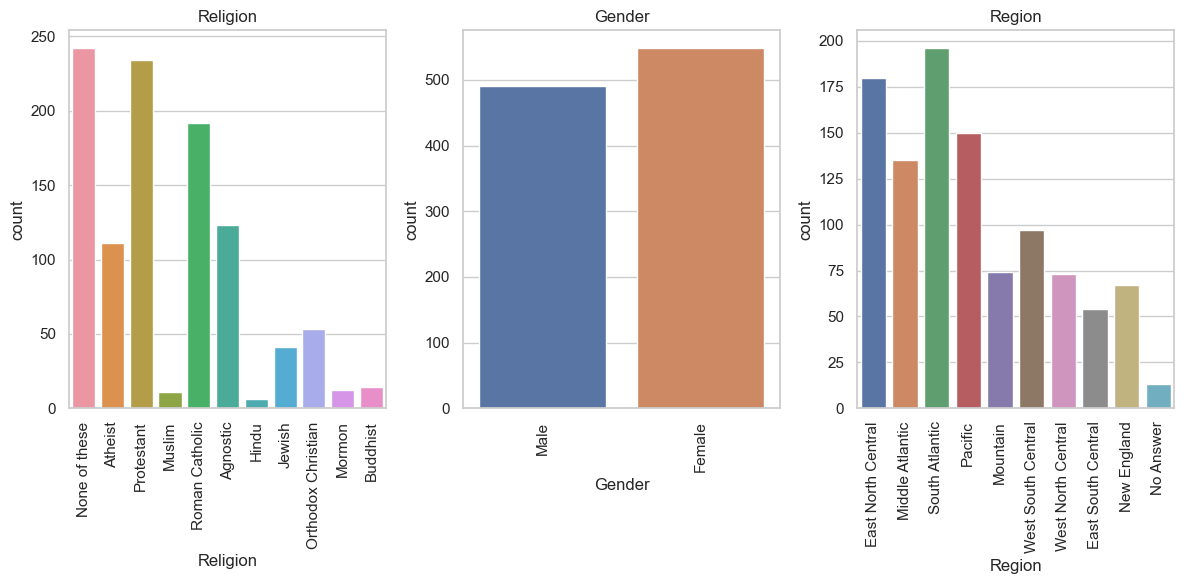

In [ ]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(cat_columns):
    plt.subplot(1, len(cat_columns), i+1)
    sns.countplot(x=column, data=df)
    plt.title(column)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


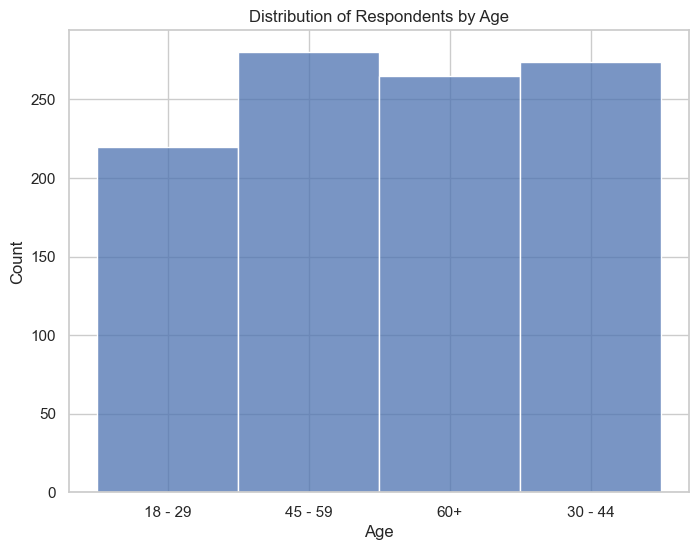

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20,)
plt.title('Distribution of Respondents by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
